<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/main/Jupiter%20Notebooks/EDA_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charlotte 311 Service Request Analysis

<h1> <b> Exploratory Data Analysis and Preprocessing </b> </h1>

## Data Import and Survey

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Function to read data from URL
def read_data_from_URL(url):
    df=pd.read_csv(url)
    return df

In [3]:
# Read in the data
serv_req_url='https://bitbucket.org/nthammad-uncc/test_repo/raw/7508681846896228bb87fd1989ec50ca2d592bc5/data/Service_Requests_311.csv'
requests = read_data_from_URL(serv_req_url)
requests.head()

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,...,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID,Shape
0,1.458251e+06,508075.000119,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:25:00+00,...,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089,NaN,{35439C7B-D8E4-4296-9119-8673B1D5A7C8},20904304,NaN
1,1.468687e+06,587225.999953,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,2016/11/07 14:28:00+00,...,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941,NaN,{3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2},02731251,NaN
2,1.471481e+06,562512.999839,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:34:00+00,...,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094,NaN,{C3E4CF76-7630-4356-8216-428445A0903F},08917486,NaN
3,1.438992e+06,568604.000124,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,2016/11/07 14:41:00+00,...,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327,NaN,{FC3B4CD8-1131-42B4-A37E-8CA448855B24},03925515,NaN
4,NaN,NaN,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,2016/11/07 14:44:00+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{E0166346-2381-40E1-80A0-2ECA4FB6CB27},NaN,NaN


In [4]:
print("Records:", requests.shape[0], "\nFeatures:", requests.shape[1])
print(requests.info())

Records: 1631510 
Features: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   X                           1559084 non-null  float64
 1   Y                           1559084 non-null  float64
 2   OBJECTID                    1631510 non-null  int64  
 3   DEPARTMENT                  1631510 non-null  object 
 4   DIVISION                    1623095 non-null  object 
 5   REQUEST_NO                  1631510 non-null  int64  
 6   FISCAL_YEAR                 1631510 non-null  int64  
 7   FISCAL_MONTH                1631510 non-null  object 
 8   REQUEST_TYPE                1631510 non-null  object 
 9   RECEIVED_DATE               1631510 non-null  object 
 10  INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 11  TITLE                       1631510 non-null  object 
 12  CMPD_DIVISION            

## Initial Variable Selection


<b> The following variables will be dropped: </b>
<ol>
<li> X - redundant with X_COORD </li>
<li> Y - redundant with Y_COORD </li>
<li> FISCAL YEAR - redundant with RECEIVED_DATE </li>
<li> FISCAL MONTH - redundant with RECEIVED_DATE </li>
<li> TITLE - redundant with REQUEST_TYPE </li>
<li> CMPD_DIVISION - too many missing values </li>
<li> STREET_DIRECTION - redundant </li>
<li> STREET_NAME - redundant </li>
<li> STREET_TYPE - redundant </li>
<li> CITY - redundant </li>
<li> STATE - redundant </li>
<li> COUNCIL_DISTRICT - too many missing values </li>
<li> GLOBAL_ID - no predictive value </li>
<li> PID - no predictive value </li>
<li> SHAPE - all missing </li>
</ol>

In [5]:
requests.drop(requests.iloc[:, [0,1,4,6,7,11,12,15,16,17,18,19,26,27,28,29]], axis=1, inplace=True)
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   OBJECTID                    1631510 non-null  int64  
 1   DEPARTMENT                  1631510 non-null  object 
 2   REQUEST_NO                  1631510 non-null  int64  
 3   REQUEST_TYPE                1631510 non-null  object 
 4   RECEIVED_DATE               1631510 non-null  object 
 5   INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 6   NEIGHBORHOOD_PROFILE_AREA   1559062 non-null  float64
 7   BLOCK_NO                    1587157 non-null  float64
 8   ZIP_CODE                    1586427 non-null  float64
 9   FULL_ADDRESS                1624342 non-null  object 
 10  X_COORD                     1559084 non-null  float64
 11  Y_COORD                     1559084 non-null  float64
 12  LATITUDE                    1559077 non-null  float64
 1

In [6]:
backup = requests # make a data backup prior to data manipulations

# Drop all records which are missing addresses or LATITUDE and LONGITUDE
print('Size before dropping records:', requests.shape)
start_size = requests.shape[0]
requests = requests[~requests['FULL_ADDRESS'].isnull() & 
                    ~requests['ZIP_CODE'].isnull() &
                    ~requests['LATITUDE'].isnull() & 
                    ~requests['LONGITUDE'].isnull()]
num_nulls = start_size - requests.shape[0]
print('Size after dropping {dropped} records:'.format(dropped = num_nulls), requests.shape)

Size before dropping records: (1631510, 14)
Size after dropping 99170 records: (1532340, 14)


In [7]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532340 entries, 0 to 1631509
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   OBJECTID                    1532340 non-null  int64  
 1   DEPARTMENT                  1532340 non-null  object 
 2   REQUEST_NO                  1532340 non-null  int64  
 3   REQUEST_TYPE                1532340 non-null  object 
 4   RECEIVED_DATE               1532340 non-null  object 
 5   INTERNAL_FIELD_OBSERVATION  1532340 non-null  object 
 6   NEIGHBORHOOD_PROFILE_AREA   1532325 non-null  float64
 7   BLOCK_NO                    1532340 non-null  float64
 8   ZIP_CODE                    1532340 non-null  float64
 9   FULL_ADDRESS                1532340 non-null  object 
 10  X_COORD                     1532340 non-null  float64
 11  Y_COORD                     1532340 non-null  float64
 12  LATITUDE                    1532340 non-null  float64
 1

In [8]:
backup = requests # update the backup after successful variable null value removal

## Survey Request Types and Departments

In [9]:
print("Total unique request categories:", requests['REQUEST_TYPE'].unique().shape[0], "\n")
print("Top 30 categories by volume:\n")
print(requests['REQUEST_TYPE'].value_counts().head(30), "\n")

print("Top 30 departments by volume:\n")
print(requests['DEPARTMENT'].value_counts().head(30))

Total unique request categories: 162 

Top 30 categories by volume:

NON_RECYCLABLE ITEMS         820199
RECYCLABLE ITEMS             196945
HNS HEALTH AND SANITATION     77723
CART REPAIR-GARBAGE           36238
MISSED RECYCLING              27098
SW DOCUMENT GARBAGE           26405
311 DOCUMENT                  22379
SW DOCUMENT RECYCLING         17706
CDOT STREETLIGHT REPAIR       16627
CART ISSUE/MISSING CART       14850
TIRES                         13440
SW DOCUMENT YARD WASTE        13054
DEAD ANIMAL COLLECTION        10701
CART DELIVERY RECYCLING       10385
ZONING/COMPLAINT/ INSPECT      9994
CART(S) DEL- NEW BUILD         9901
CART REPAIR-RECYCLE            9852
CART ONLY DELIVER-GARB         9794
COMPLAINT                      8486
HNS HOUSING                    8161
CART PURCHASE 2ND-GARBAGE      8002
ZON GENERAL INFO  INQUIRY      7894
MISSED GARBAGE                 7127
PARKING ON LAWN WORKDAYS       6812
SWS LIAISON                    5277
CDOT POTHOLE REPAIR            

In [10]:
print("Bottom 50 categories by volume:\n")
print(requests['REQUEST_TYPE'].value_counts().tail(50).sort_values(ascending=True))

Bottom 50 categories by volume:

SWS MLTFMLY FIELD OBSERVE      1
BUS STOP-FULL TRASH  CAN       1
SW EXCESSIVE STORM-SW USE      1
DISABILITY ACT                 1
UT/MANDATORY                   1
SMOKING VEHICLE REPORT         1
ON CALL - SWS SPEC SERV        1
SW FIELD OBSERVED TO CI        1
SW REMINDER BULKY-SW USE       2
BUS STOP-TRASH CAN MISC        2
BULKY ITEM SCHEDULE            3
NEW SVC BUSINESS GARBAGE       4
SW REMINDER GARB-SW USE        4
BUS FACILITIES MAINT           4
LAND DEVELOPMENT INQUIRY       4
SW ESCALATION REQUEST          4
CART REPAIR-BUSN GARB          5
OPINION                        5
CART DELIVERY BUSN GARB        7
UT RATE CHANGE                 7
MUD IN THE STREET              8
CART ONLY DELIVER-RECY         8
TELL TRANSIT CONCERN          10
CWP REQUEST-HIGH PRIORITY     11
SWS CART RETIRE REVIEW        11
PARK & REC REFUND/CANCEL      11
DISABLED INSPECTION (SWS)     12
ZON APPEALS/CITATIONS INQ     14
SUGGESTION/IDEA               19
DAMAGE/INV

### Display all 311 request types alphabetically

In [11]:
# Set Display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Subset requests by unique values, sorted
A_CART = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[0:25].reset_index()
CDOT_COM = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[25:50].reset_index()
CON_INV = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[50:75].reset_index()
INV_PAR = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[75:100].reset_index()
PARK_SWDOC = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[100:125].reset_index()
SWESC_ZON = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[125:150].reset_index()
ZON_ZON = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[150:165].reset_index()

# Combine those 7 Series of 25 values each into 1 data frame for convenient side-by-side display 
categories = pd.concat([A_CART, CDOT_COM, CON_INV, INV_PAR, PARK_SWDOC, SWESC_ZON, ZON_ZON], axis=1)
categories.drop(categories.iloc[:,[0,2,4,6,8,10,12]], axis=1, inplace=True) # drop the index columns
categories.columns = ['A-CART', 'CDOT-COM', 'CON-INV', 'INV-PAR', 'PARK-SWDOC', 'SWESC-ZON', 'ZON-ZON']
categories.reset_index(drop=True)
categories = categories.style.set_properties(**{'text-align': 'left', 'font-size': '12px'}) # left justify for easy comparison of topics to determine possible bins / combinations
categories

,A-CART,CDOT-COM,CON-INV,INV-PAR,PARK-SWDOC,SWESC-ZON,ZON-ZON
0,3-1-1 ESCALATION REQUEST,CDOT CLEAN CATCH BASIN,COVID 19-PUBLIC GATHERING,INVESTIGATE/CONTACT YD WT,PLANNING INQUIRY,SW FIELD OBSERVED TO CI,ZON SETBACKS
1,311 DOCUMENT,CDOT FLOODING,COVID 19-STAY HOME VIOL,LAND DEVELOPMENT INQUIRY,POLLUTION,SW ONLY-DOOR HANGER LEFT,ZON SIGNS INQUIRY
2,ADOPT-A PICKUP SWS,CDOT GRATE DAMAGE/REPLACE,CURRENT DISABLED SERVICE,LANDSCAPE LIMBS,RECYCLABLE ITEMS,SW REMINDER BULKY-SW USE,ZON STORAGE BLDG/ACC UNIT
3,ANIMAL FOUND REPORT,CDOT GUARD RAIL,CWP REQUEST,LANDSCAPE TREES,REQUEST DISABILITY FORM,SW REMINDER GARB-SW USE,ZON SUBDIVIDE PROP/DUPLX
4,BLOCKAGE,CDOT MISCELLANEOUS,CWP REQUEST-HIGH PRIORITY,LITTER/DEBRIS IN STREET,REQUEST FOR SPEAKER,SW REMINDER RECY-SW USE,ZON SUPERVISORY COMPLAINT
5,BOARDED UP STRUCTURE,CDOT NEW CROSSWALK,DAMAGE/INVESTIGATE BULKY,MISSED BULKY ITEM,SIDEWALK OBSTR CONTAINERS,SW REMINDER YARD-SW USE,ZON VERIFICATION LETTERS
6,BULKY ITEM SCHEDULE,CDOT NEW SIDEWALK,DAMAGE/INVESTIGATE GARB,MISSED BUSINESS GARBAGE,SIDEWALK OBSTRUCT OTHER,SWAT-A-LITTERBUG,ZON WATERSHED/SWPE INQ
7,BUS FACILITIES MAINT,CDOT NEW SIGN,DAMAGE/INVESTIGATE RECY,MISSED GARBAGE,SIGNS (NOT FOR 311 USE),SWS CART DATA LOAD,ZONGROUP/BOARDING HOMES
8,BUS STOP-FULL TRASH CAN,CDOT NEW STREETLIGHTS,DAMAGE/INVESTIGATE YRD WS,MISSED RECYCLING,SMOKING VEHICLE REPORT,SWS CART RETIRE REVIEW,ZONHOME BUSINESS/APPROVAL
9,BUS STOP-TRASH CAN MISC,CDOT NEW TRAFFIC SIGNAL,DEAD ANIMAL COLLECTION,MISSED YARD WASTE,SPILLED BULKY ITEMS,SWS CART SHIPMT REVIEW,ZONING/COMPLAINT/ INSPECT


## Decisions on selection and binning:

- We will want to retain the option to use all categories and compare that to the performance of our analyses when using self-determined bins.

- Binning roughly around general categories--for example all CART-related requests into one category, cleanliness-related requests such as trash in the street and pollution into one category--we can encode a new column with only 39 categories.

- After binning, any categories with fewer than 30 records are dropped.

- We also eliminate several Solid Waste Services administrative categories, such as data loads, as well as three COVID-19-related categories, which we choose to exclude from this analysis.


In [12]:
# First, drop the excluded request types as described above
types_to_drop = ["UT RATE CHANGE", "UT/LANDSCAPE", "UT/MANDATORY", "SWS CART DATA LOAD", "SWS CART RETIRE REVIEW", "SWS CART SHIPMT REVIEW", "SWS LIAISON", "SWS MLTFMLY FIELD OBSERVE", "SW EXCESSIVE STORM-SW USE", 
                 "SW FIELD OBSERVED TO CI", "SMOKING VEHICLE REPORT", "COVID 19-PRICE GOUGING", "COVID 19-PUBLIC GATHERING", "COVID 19-STAY HOME VIOL", "TELL TRANSIT CONCERN", "ON CALL - SWS SPEC SERV"]
start = requests.shape[0]
requests = requests[~requests['REQUEST_TYPE'].isin(types_to_drop)]
end = requests.shape[0]
print("{0:5d} requests were dropped.".format(start-end))

 8279 requests were dropped.


In [13]:
# Define the 16 request category bins. Twenty-three remaining types will simply be transferred as categories and not binned, making the 39 total categories.
cats = {
    'Category Name':["ESCALATION REQUEST", "BULKY ITEM", "TRANSPORTATION", "CART", "CUSTOMER FEEDBACK", "DISABLED SERVICE", "CWP", "GARBAGE", "RECYCLING", "YARD WASTE", 
                     "DISABILITY ACT", "VIOLATIONS", "WEATHER AND ENVIRONMENTAL", "ADMINISTRATIVE ACTIONS", "CLEANLINESS", "MISSED SERVICE", "ZONING"],
        'Request Types':[["3-1-1 ESCALATION REQUEST",  "SW ESCALATION REQUEST"],
                        ["DAMAGE/INVESTIGATE BULKY",  "INVESTIGATE/CONTACT BULKY",  "SW DOCUMENT BULKY ITEMS",  "SW REMINDER BULKY-SW USE",  "BULKY ITEM SCHEDULE"],
                        ["BUS FACILITIES MAINT",  "BUS STOP-FULL TRASH  CAN",  "BUS STOP-REMOVE TRASH CAN",  "BUS STOP-TRASH CAN MISC",  "CDOT BASKETBALL",  
                         "CDOT CLEAN CATCH BASIN",  "CDOT FLOODING",  "CDOT GRATE DAMAGE/REPLACE",  "CDOT GUARD RAIL",  "CDOT MISCELLANEOUS",  "CDOT NEW CROSSWALK",  
                         "CDOT NEW SIDEWALK",  "CDOT NEW SIGN",  "CDOT NEW STREETLIGHTS",  "CDOT NEW TRAFFIC SIGNAL",  "CDOT POTHOLE REPAIR",  "CDOT RESURFACING ISSUES",  
                         "CDOT ROAD QUALITY",  "CDOT SIDEWALK REPAIR",  "CDOT SIGHT OBSTRUCTION",  "CDOT STREET SIGN REP/REPL",  "CDOT STREETLIGHT REPAIR",  
                         "CDOT TRAF SIGNAL REPAIR",  "CDOT TRAF SIGNAL TIMING",  "CDOT TRAFFIC CALMING", "NCDOT POTHOLE REQUEST",	"SIDEWALK OBSTR CONTAINERS",	
                         "SIDEWALK OBSTRUCT OTHER",	"SIGNS (NOT FOR 311 USE)",	"STREET MAINTENANCE - SNOW",	"STREET SWEEPING/FLUSHING"],
                        ["CART DELIVERY BUSN GARB",  "CART DELIVERY RECYCLING",  "CART ISSUE/MISSING CART",  "CART ONLY DELIVER-GARB",  "CART ONLY DELIVER-RECY",  
                         "CART PICKUP BUSN GARB",  "CART PICKUP- GARBAGE",  "CART PICKUP-RECYCLE",  "CART PURCHASE 2ND-GARBAGE",  "CART PURCHASE 2ND-RECYCLE",  
                         "CART REPAIR-BUSN GARB",  "CART REPAIR-GARBAGE",  "CART REPAIR-RECYCLE",  "CART(S) DEL- NEW BUILD"],
                        ["CITIZEN FEEDBACK",  "COMPLEX PROBLEM",  "COMPLIMENT/THANKS",  "INQUIRY",  "OPINION",  "STW GENERAL INQUIRY",  "SUGGESTION/IDEA",  
                         "MOBILE APP FEEDBACK",  "LAND DEVELOPMENT INQUIRY",  "PLANNING INQUIRY",  "TAX BILL INQUIRY"],
                        ["CURRENT DISABLED SERVICE",  "DISABLED INSPECTION (SWS)"],
                        ["CWP REQUEST",  "CWP REQUEST-HIGH PRIORITY"],
                        ["DAMAGE/INVESTIGATE GARB",  "SW DOCUMENT GARBAGE",  "INVESTIGATE/CONTACT GARB",  "SW REMINDER GARB-SW USE"],
                        ["DAMAGE/INVESTIGATE RECY",  "SW DOCUMENT RECYCLING",  "INVESTIGATE/CONTACT RECY",  "SW REMINDER RECY-SW USE"],
                        ["DAMAGE/INVESTIGATE YRD WS",  "SW DOCUMENT YARD WASTE",  "INVESTIGATE/CONTACT YD WT",  "SW REMINDER YARD-SW USE"],
                        ["DISABILITY ACT",  "DISABILITY CANCEL/ CHANGE", "REQUEST DISABILITY FORM"],
                        ["DUMPING IN STREET/ROW",  "GRAFFITI",  "PARKING ON LAWN OFFHOURS",  "PARKING ON LAWN WORKDAYS",  "SWAT-A-LITTERBUG"],
                        ["EROSION",  "FLOODING",  "LANDSCAPE LIMBS",  "LANDSCAPE TREES"],
                        ["NEW SERVICE/CHNG MLTIPLX",  "NEW SVC BUSINESS GARBAGE",  "NON-RESIDEN BUILDING CODE",  "MULTIPLEX REVIEW",  
                         "PARK & REC REFUND/CANCEL",  "INVALID/NEW SW ADDRESS"],
                        ["SPILLED BULKY ITEMS",  "SPILLED GARBAGE",  "SPILLED RECYCLING",  "SPILLED YARD WASTE",  "MUD IN STREET-CONSTRUCTIO",  
                         "MUD IN THE STREET",  "LITTER/DEBRIS IN STREET",  "POLLUTION"],
                        ["MISSED BULKY ITEM",  "MISSED BUSINESS GARBAGE",  "MISSED GARBAGE",  "MISSED RECYCLING",  "MISSED YARD WASTE"],
                        ["ZON ABC PERMITS INQUIRY",  "ZON APPEALS/CITATIONS INQ",  "ZON DAYCARE/CHILDCARE INQ",  "ZON FENCE/OPEN SPACE INQ",  
                         "ZON HOLDS RELEASE REQUEST",  "ZON RESIDENTIAL PERMITS",  "ZON SETBACKS",  "ZON SIGNS INQUIRY",  "ZON STORAGE BLDG/ACC UNIT",  
                         "ZON SUBDIVIDE PROP/DUPLX",  "ZON SUPERVISORY COMPLAINT",  "ZON VERIFICATION LETTERS",  "ZON WATERSHED/SWPE INQ",  "ZONGROUP/BOARDING HOMES",  
                         "ZONHOME BUSINESS/APPROVAL",  "ZONMOBILE FOOD/TENT SALES",  "ZONSETBACKS/STORAGE BUILD"]]
        }
cats = pd.DataFrame(cats)
cats

,Category Name,Request Types
0,ESCALATION REQUEST,"[3-1-1 ESCALATION REQUEST, SW ESCALATION REQUEST]"
1,BULKY ITEM,"[DAMAGE/INVESTIGATE BULKY, INVESTIGATE/CONTACT..."
2,TRANSPORTATION,"[BUS FACILITIES MAINT, BUS STOP-FULL TRASH CA..."
3,CART,"[CART DELIVERY BUSN GARB, CART DELIVERY RECYCL..."
4,CUSTOMER FEEDBACK,"[CITIZEN FEEDBACK, COMPLEX PROBLEM, COMPLIMENT..."
5,DISABLED SERVICE,"[CURRENT DISABLED SERVICE, DISABLED INSPECTION..."
6,CWP,"[CWP REQUEST, CWP REQUEST-HIGH PRIORITY]"
7,GARBAGE,"[DAMAGE/INVESTIGATE GARB, SW DOCUMENT GARBAGE,..."
8,RECYCLING,"[DAMAGE/INVESTIGATE RECY, SW DOCUMENT RECYCLIN..."
9,YARD WASTE,"[DAMAGE/INVESTIGATE YRD WS, SW DOCUMENT YARD W..."


In [14]:
# Default the category value initially to be the request type
requests['REQUEST_CAT'] = requests['REQUEST_TYPE'] 

# Encode new column by binning the categories. Default values of request type will then remain for the 23 smaller categories.
for cat in range(len(cats)) :
    label = cats.iloc[cat][0]
    requests.loc[requests['REQUEST_TYPE'].isin(cats.iloc[cat][1]), 'REQUEST_CAT'] = label

# Reorder the columns
requests = requests.iloc[:,[0,1,2,14,3,4,5,6,7,8,9,10,11,12,13]]

<ipython-input-14-8d46e5c07e51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  requests['REQUEST_CAT'] = requests['REQUEST_TYPE']
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [15]:
backup = requests # update the backup after successful variable addition and column reorder

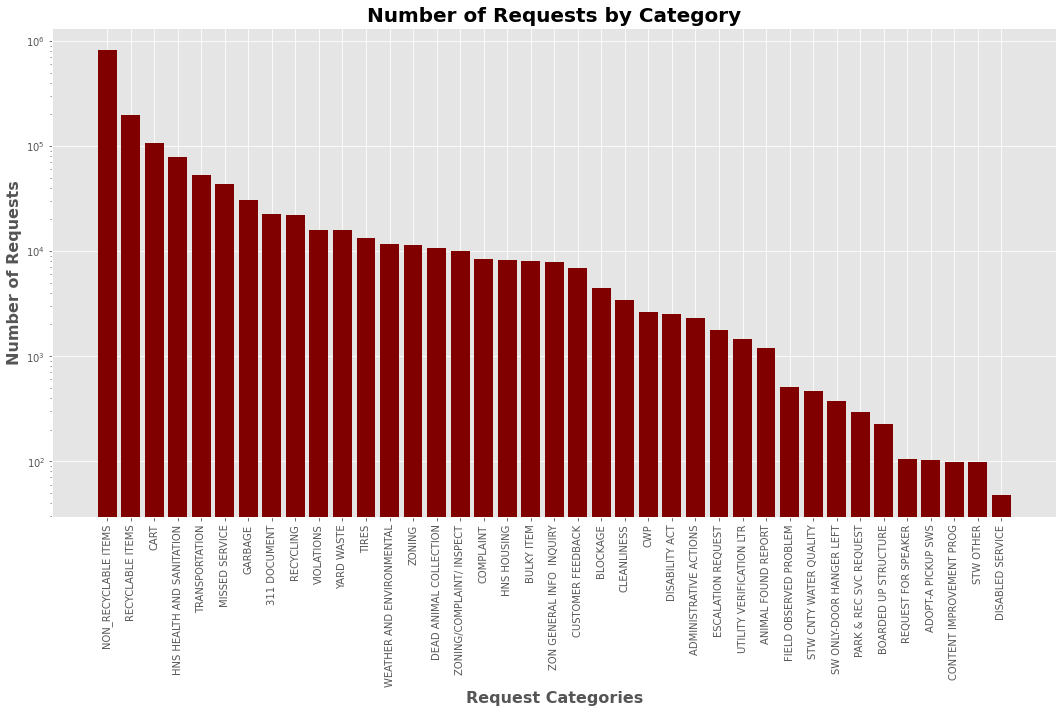

In [16]:
request_cats = requests[['REQUEST_CAT']].value_counts()
cat_names = request_cats.to_frame().reset_index()
cat_names.columns = ['Category', 'Count']

plt.figure(figsize=(18,9))
x_pos = [i for i, _ in enumerate(request_cats)]
x = range(len(request_cats))
y = request_cats
plt.bar(x, y, color='maroon')
plt.yscale('log')
plt.xlabel("Request Categories", fontweight='bold', fontsize=16)
plt.ylabel("Number of Requests", fontweight='bold', fontsize=16)
plt.title("Number of Requests by Category", fontweight='bold', fontsize=20)

plt.xticks(x_pos, cat_names.iloc[:,0], rotation=90)

plt.show()

In [17]:
# Set sorting order for REQUEST_CAT to keep this highest volume to lowest volume order for the whole data set
cat_order = cat_names['Category'].tolist()
requests['REQUEST_CAT'] = pd.Categorical(requests['REQUEST_CAT'], cat_order, ordered=True)

## Observations on Request Categories

By binning many of the related categories, we have a much more balanced grouping of categories in the 10-100k range than we did before. Of course the two major categories of Non-recyclable and Recyclable Items are still several times larger than the others, but we may be able to see more useful trends within the 3rd through 17th largest categories than we otherwise would have.

## Request Categories Time Series and Seasonality

In [18]:
# Divide categories by season of the year
requests['RECEIVED_DATE'] = pd.to_datetime(requests['RECEIVED_DATE'], format='%Y/%m/%d %H:%M')
requests['SEASON'] = requests['RECEIVED_DATE'].dt.quarter

# Create new columns in the requests dataset for month and year
requests['RECEIVED_MONTH']= pd.to_datetime(requests['RECEIVED_DATE']).dt.month
requests['RECEIVED_YEAR']= pd.to_datetime(requests['RECEIVED_DATE']).dt.year
requests = requests.iloc[:,[0,1,2,3,4,5,16,17,15,6,7,8,9,10,11,12,13,14]] # reorder columns
requests.head()

,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,INTERNAL_FIELD_OBSERVATION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE
0,1,Solid Waste Services,6402056,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:25:00+00:00,11,2016,4,N,215.0,3601.0,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089
1,2,Housing and NBHD Serv,6402064,UTILITY VERIFICATION LTR,UTILITY VERIFICATION LTR,2016-11-07 14:28:00+00:00,11,2016,4,N,265.0,4124.0,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941
2,3,Solid Waste Services,6402082,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:34:00+00:00,11,2016,4,N,103.0,523.0,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094
3,4,Solid Waste Services,6402103,MISSED SERVICE,MISSED RECYCLING,2016-11-07 14:41:00+00:00,11,2016,4,N,158.0,1801.0,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327
5,6,Finance/City,6402112,CWP,CWP REQUEST,2016-11-07 14:45:00+00:00,11,2016,4,N,88.0,309.0,28208.0,"309 JONES ST APT 1, CHARLOTTE, NC 28208",1439454.0,552715.0,35.254120,-80.877772


### 311 Service requests plotted over various time scales

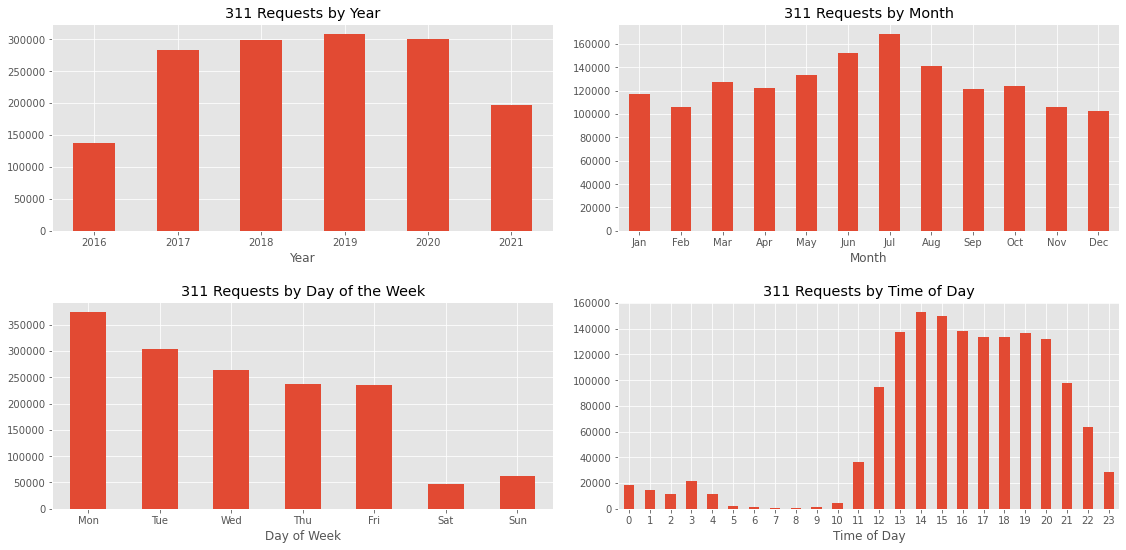

In [19]:
# 311 Service requests plotted over various time scales
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
requests.groupby(requests['RECEIVED_YEAR'].rename('Year')).size().plot.bar()
plt.title("311 Requests by Year")
plt.xticks(ticks=range(6), rotation=0)
plt.subplot(2,2,2)
requests.groupby(requests['RECEIVED_MONTH'].rename('Month')).size().plot.bar()
plt.title("311 Requests by Month")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.subplot(2,2,3)
requests.groupby(requests['RECEIVED_DATE'].rename('Day of Week').dt.dayofweek).size().plot.bar()
plt.title("311 Requests by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.subplot(2,2,4)
requests.groupby(requests['RECEIVED_DATE'].rename('Time of Day').dt.hour).size().plot.bar()
plt.title("311 Requests by Time of Day")
plt.xticks(ticks=range(24), rotation=0)
plt.tight_layout(pad=2.0)

### Top 3 categories in each month ranked by highest proportions of total requests for that category

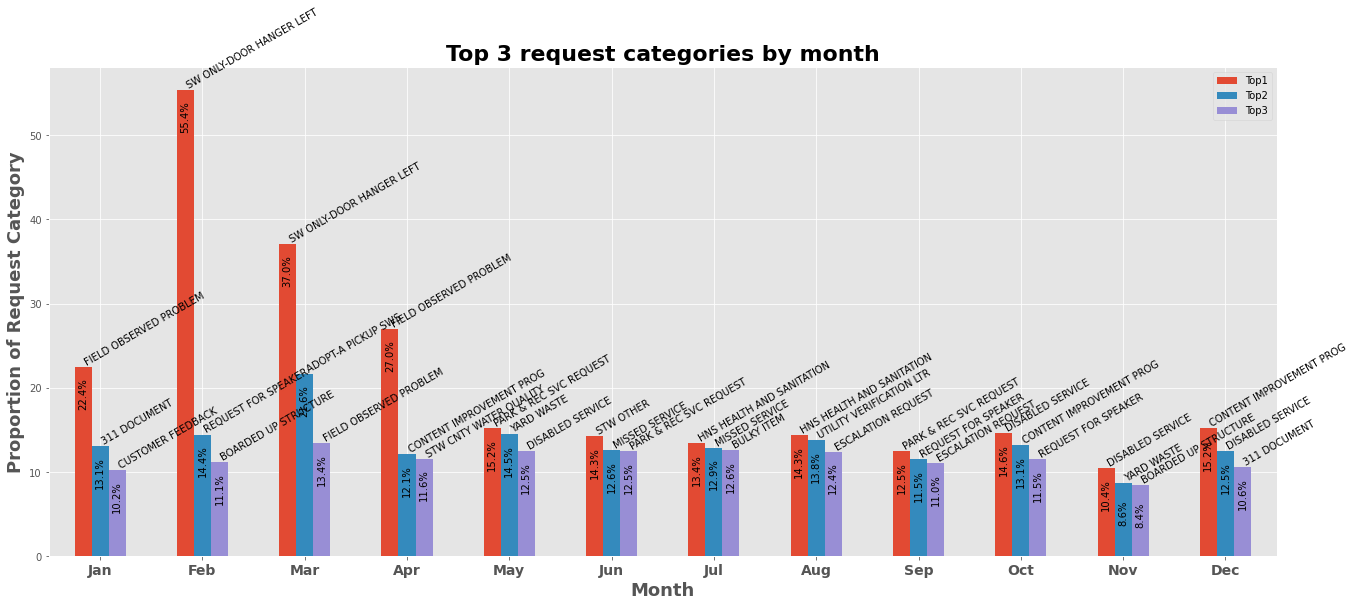

In [20]:
# Initialize lists to store values from the loop below
top3s = []
labels0 = []
labels1 = []
labels2 = []
plotdata = []

# Loop through the months, select top 3 categories and their corresponding labels
for i in range(0,12) :  # for each month
  request_cats_month = requests['RECEIVED_MONTH'].eq(i+1).groupby(requests['REQUEST_CAT']).sum()  # get the value counts by request category
  proportions = request_cats_month.to_numpy()/request_cats.to_numpy() * 100  # convert the counts to proportion of that category that occurred in that month
  month_max3 = (-np.round(proportions,1)).argsort()[:3]  # select the top 3 
  top3s.append(month_max3) # and store them in a list
  month_labels = cat_names['Category'].iloc[month_max3,].values  # retrieve those category labels
  labels0.append(month_labels[0]) # store them in 3 separate lists
  labels1.append(month_labels[1])
  labels2.append(month_labels[2])
  plotdata.append(proportions[month_max3]) # store the proportion values in plotdata

plotdata = pd.DataFrame(plotdata, index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], columns=['Top1', 'Top2', 'Top3'])
plotlabels = labels0 + labels1 + labels2

# Plot
plt.rcParams["figure.figsize"] = (22,9)
ax = plotdata.plot(kind="bar")
ax.set_title("Top 3 request categories by month", fontweight='bold', fontsize=22)
ax.set_xlabel("Month", fontweight='bold', fontsize=18)
ax.set_ylabel("Proportion of Request Category", fontweight='bold', fontsize=18)
ax.set_xticklabels(plotdata.index.values.tolist(), rotation=0, fontweight='bold', fontsize=14)

rects = ax.patches
for rect, label in zip(rects, plotlabels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="left", va="bottom", rotation=30
    )
    ax.text(
        rect.get_x() + rect.get_width() / 2, height-5 , "{:.1%}".format(height/100), ha="center", va="bottom", rotation=90
    )

plt.show()

### Seasonality

In [21]:
# Get value counts of each category by season
request_cats_winter = requests['SEASON'].eq(1).groupby(requests['REQUEST_CAT']).sum()
request_cats_spring = requests['SEASON'].eq(2).groupby(requests['REQUEST_CAT']).sum()
request_cats_summer = requests['SEASON'].eq(3).groupby(requests['REQUEST_CAT']).sum()
request_cats_fall = requests['SEASON'].eq(4).groupby(requests['REQUEST_CAT']).sum()

In [22]:
backup = requests # update the backup after successful variable addition and type conversion

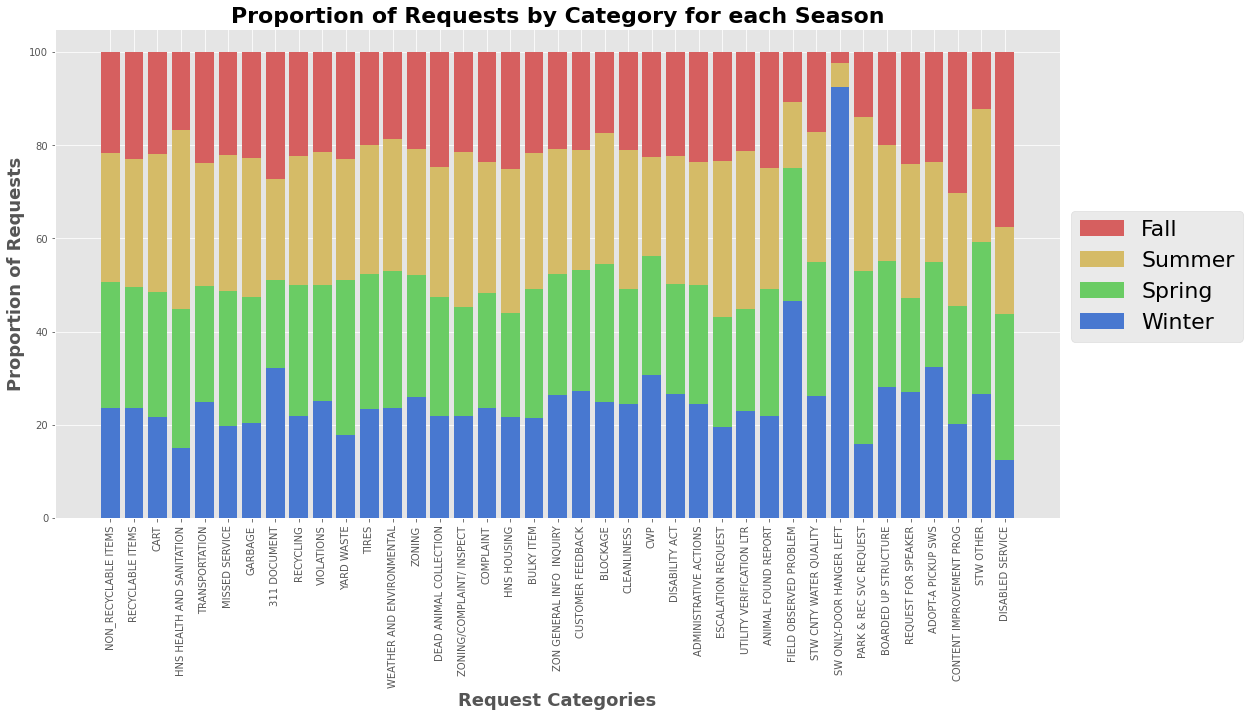

In [23]:
# Plot proportion of requests by category for each season
plt.figure(figsize=(18,9))
pal = sns.color_palette('muted').as_hex()

x_pos = [i for i, _ in enumerate(request_cats)]
x = range(len(request_cats))
y1 = request_cats_winter.to_numpy()/request_cats.to_numpy() * 100
y2 = request_cats_spring.to_numpy()/request_cats.to_numpy() * 100
y3 = request_cats_summer.to_numpy()/request_cats.to_numpy() * 100
y4 = request_cats_fall.to_numpy()/request_cats.to_numpy() * 100

plt.bar(x, y1, color=pal[0], label='Winter')
plt.bar(x, y2, color=pal[2], label='Spring', bottom=y1)
plt.bar(x, y3, color=pal[8], label='Summer', bottom=y1+y2)
plt.bar(x, y4, color=pal[3], label='Fall', bottom=y1+y2+y3)

plt.xlabel("Request Categories", fontweight='bold', fontsize=18)
plt.ylabel("Proportion of Requests", fontweight='bold', fontsize=18)
plt.title("Proportion of Requests by Category for each Season", fontweight='bold', fontsize=22)
plt.xticks(x_pos, cat_names.iloc[:,0], rotation=90)

plt.legend(handles=reversed(plt.legend().legendHandles), labels=['Fall','Summer','Spring','Winter'],
           loc='upper left', bbox_to_anchor=(1, 0.65), fontsize=22)
plt.show()

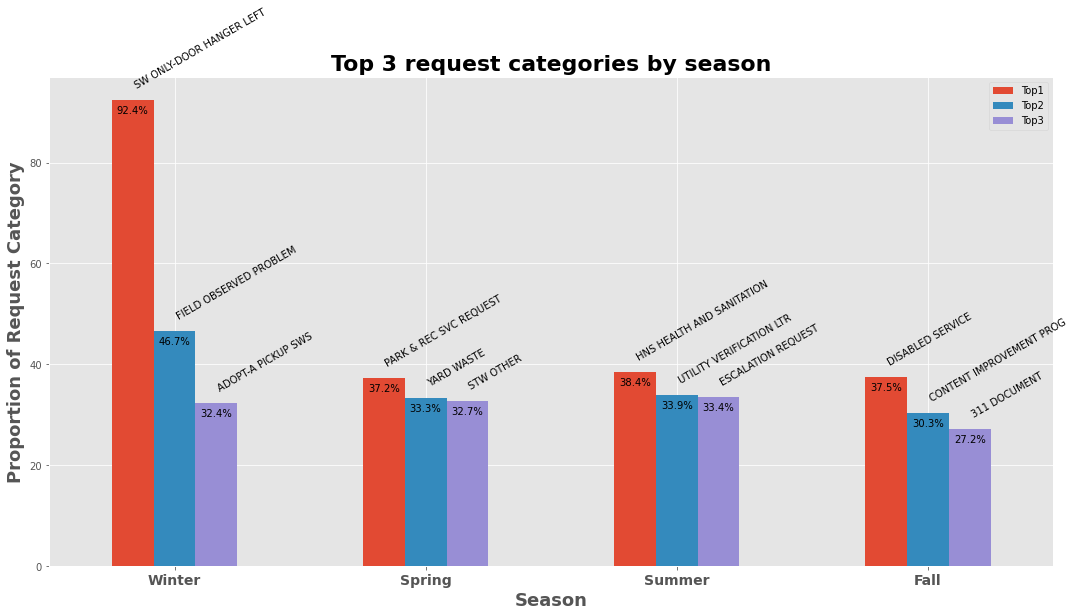

In [24]:
# Display the largest proportions of requests by category for each season

# Sort and select the top 3 values
win_max3 = (-np.round(y1,1)).argsort()[:3]
spr_max3 = (-np.round(y2,1)).argsort()[:3]
sum_max3 = (-np.round(y3,1)).argsort()[:3]
fal_max3 = (-np.round(y4,1)).argsort()[:3]

# Retrieve the labels for each season's top 3 categories
win_labels = cat_names['Category'].iloc[win_max3,].values
spr_labels = cat_names['Category'].iloc[spr_max3,].values
sum_labels = cat_names['Category'].iloc[sum_max3,].values
fal_labels = cat_names['Category'].iloc[fal_max3,].values

# Rearrange labels into one list
plotlabels = []
for i in range(0,3) :
  plotlabels.append(win_labels[i])
  plotlabels.append(spr_labels[i])
  plotlabels.append(sum_labels[i])
  plotlabels.append(fal_labels[i])

# Combine data into one frame
plotdata = pd.DataFrame({
    "Winter":y1[win_max3],
    "Spring":y2[spr_max3],
    "Summer":y3[sum_max3],
    "Fall":y4[fal_max3]
    }, 
    index=["Top1", "Top2", "Top3"]
).transpose()

# Plot
plt.rcParams["figure.figsize"] = (18,9)

ax = plotdata.plot(kind="bar")
ax.set_title("Top 3 request categories by season", fontweight='bold', fontsize=22)
ax.set_xlabel("Season", fontweight='bold', fontsize=18)
ax.set_ylabel("Proportion of Request Category", fontweight='bold', fontsize=18)
ax.set_xticklabels(plotdata.index.values.tolist(), rotation=0, fontweight='bold', fontsize=14)

rects = ax.patches
for rect, label in zip(rects, plotlabels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 2, label, ha="left", va="bottom", rotation=30
    )
    ax.text(
        rect.get_x() + rect.get_width() / 2, height - 3, "{:.1%}".format(height/100), ha="center", va="bottom"
    )

plt.show()

## Observations on Time Series and Seasonality

Discuss observations here.

## Customers with the highest number of requests

In [25]:
# Create an index ID for addresses in descending order of 311 call volume, and replace addresses in the data set with their index values
address_indices = requests['FULL_ADDRESS'].value_counts().to_frame(name='COUNT').reset_index()
address_indices['new_column'] = range(len(address_indices))
address_indices['new_column'] += 1
address_indices.columns = ['FULL_ADDRESS', 'TOTAL_CALLS', 'ADDRESS_ID']

# Merge new variables
requests = requests.merge(address_indices, on='FULL_ADDRESS')

# Drop full address column
requests = requests.drop(columns=['FULL_ADDRESS']).sort_values(by='OBJECTID').reset_index(drop=True)
#requests = requests.iloc[:,[0,2,1,3,4,5,6,7,8,9,18,17,10,11,12,13,14,15,16]]

In [26]:
requests.head()

,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,INTERNAL_FIELD_OBSERVATION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,TOTAL_CALLS,ADDRESS_ID
0,1,Solid Waste Services,6402056,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:25:00+00:00,11,2016,4,N,215.0,3601.0,28226.0,1458251.0,508075.0,35.132444,-80.812089,15,18902
1,2,Housing and NBHD Serv,6402064,UTILITY VERIFICATION LTR,UTILITY VERIFICATION LTR,2016-11-07 14:28:00+00:00,11,2016,4,N,265.0,4124.0,28269.0,1468687.0,587226.0,35.350408,-80.781941,10,48280
2,3,Solid Waste Services,6402082,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:34:00+00:00,11,2016,4,N,103.0,523.0,28213.0,1471481.0,562513.0,35.282654,-80.771094,7,70749
3,4,Solid Waste Services,6402103,MISSED SERVICE,MISSED RECYCLING,2016-11-07 14:41:00+00:00,11,2016,4,N,158.0,1801.0,28216.0,1438992.0,568604.0,35.297745,-80.880327,21,8256
4,6,Finance/City,6402112,CWP,CWP REQUEST,2016-11-07 14:45:00+00:00,11,2016,4,N,88.0,309.0,28208.0,1439454.0,552715.0,35.254120,-80.877772,7,79294


In [27]:
backup = requests # update the backup after successful merge of computed/transformed variables

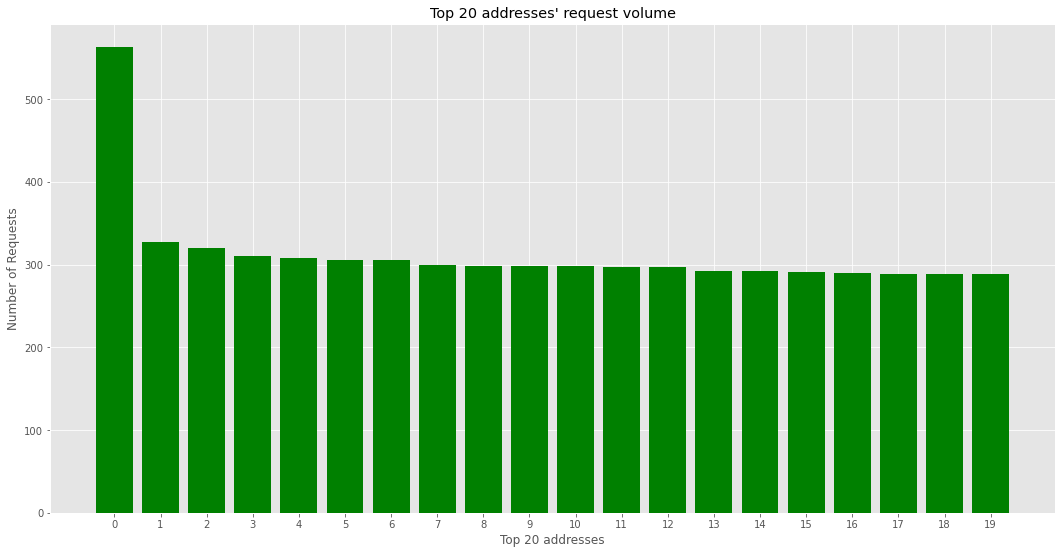

In [30]:
# Using address as "customer"
address_ranks = requests['ADDRESS_ID'].value_counts().head(20)

plt.figure(figsize=(18,9))
x_pos = [i for i, _ in enumerate(address_ranks)]
x = range(20)
y = address_ranks
plt.bar(x, y, color='green')
plt.xlabel("Top 20 addresses")
plt.ylabel("Number of Requests")
plt.title("Top 20 addresses' request volume")

plt.xticks(x_pos, x)

plt.show()

## Observations on Customers

The first address is clearly an outlier in terms of number of total requests.

In [31]:
# Add stuff from FB prophet here / interspersed throughout this section above?

## Importing Yearly Household Income dataset

In [32]:
#importing census economic dataset which contains household income and age data
census_economic_url='https://bitbucket.org/nthammad-uncc/test_repo/raw/93754ccede94c84702bb48cf44939614b4bbc2dc/data/CENSUS_ECONOMIC_2016_2019.csv'
census_df = read_data_from_URL(census_economic_url)
print("Records:", census_df.shape[0], "\nFeatures:", census_df.shape[1])

Records: 932 
Features: 551


In [33]:
census_df.head()

,YEAR,id,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Percent!!EMPLOYMENT STATUS!!Population 16 years and over,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Employed,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force!!Unemployed,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Percent!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!Not in labor force,Estimate!!EMPLOYMENT STATUS!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force,Percent!!EMPLOYMENT STATUS!!Civilian labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force,Estimate!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Percent!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Percent Margin of Error!!EMPLOYMENT STATUS!!Civilian labor force!!Unemployment Rate,Estimate!!EMPLOYMENT STATUS!!Females 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over,Percent!!EMPLOYMENT STATUS!!Females 16 years and over,Percent Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over,Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Percent Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force,Estimate!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force,Margin of Error!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force,Percent!!EMPLOYMENT STATUS!!Females 16 years and over!!In labor force!!Civilian labor force,Percent Margin of Error!!EMPLOYMENT STATUS

## Converting feature names from Census data to better format and removing unnecessary features 

In [34]:
# Function to update column names of the census dataset
# Census data set has column names that follow the format:
## 'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over'
## 'Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over'
## 'Percent!!EMPLOYMENT STATUS!!Population 16 years and over'
## 'Percent Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over'

# There are also lot of nested details in the column names like: 
## 'Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Armed Forces'

# This function updates the Estimate columns in the format:
## EMPLOYMENT STATUS_Population 16 years and over --> removing "Estimate" and including underscore
## Margin of Error_EMPLOYMENT STATUS_Population 16 years and over --> including underscores
## Percent_EMPLOYMENT STATUS_Population 16 years and over --> including underscores
## Percent Margin of Error_EMPLOYMENT STATUS_Population 16 years and over --> including underscores

## [check if it makes sense] EMPLOYMENT STATUS_Population 16 years and over_Armed Forces --> removing unnecessary nesting "Armed Forces"

# The columns starting with "Margin of Error", "Percent" and "Percent Margin of Error" will be dropped later

def rename_census_column(df):
    col_dict={}
    for col_name in df.columns.values.tolist():
        col_split=col_name.split('!!')
        if len(col_split) == 1:
            if col_split[0] == 'id':
                col_dict[col_name]='GEO_ID'
            else:
                col_dict[col_name]=col_name
        elif len(col_split) >=3:
            if col_split[0] == 'Estimate':
                col_dict[col_name]='_'.join(col_split[1:])
            else:
                col_dict[col_name]='_'.join(col_split)
        
    df.rename(col_dict, axis=1, inplace=True)

In [35]:
rename_census_column(census_df)

In [36]:
# This is a list of some unneccessary Estimate columns that need to be dropped
lst_other_col_names=['Geographic Area Name','EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force',
                        'COMMUTING TO WORK_Mean travel time to work (minutes)',
                        'EMPLOYMENT STATUS_Civilian labor force_Unemployment Rate',
                        'EMPLOYMENT STATUS_Females 16 years and over_In labor force',
                        'EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force',
                        'EMPLOYMENT STATUS_Females 16 years and over_In labor force_Civilian labor force_Employed',
                        'EMPLOYMENT STATUS_Own children of the householder under 6 years_All parents in family in labor force',
                        'EMPLOYMENT STATUS_Own children of the householder 6 to 17 years_All parents in family in labor force',
                        'COMMUTING TO WORK_Mean travel time to work (minutes)'
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$15,000 to $24,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$25,000 to $34,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$35,000 to $49,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$50,000 to $74,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$75,000 to $99,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$100,000 to $149,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With earnings',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With earnings_Mean earnings (dollars)',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With Social Security',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With Social Security_Mean Social Security income (dollars)',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With retirement income_Mean retirement income (dollars)',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With Supplemental Security Income',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With Supplemental Security Income_Mean Supplemental Security Income (dollars)',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With cash public assistance income_Mean cash public assistance income (dollars)',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$15,000 to $24,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$25,000 to $34,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$35,000 to $49,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$50,000 to $74,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$75,000 to $99,999',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$100,000 to $149,999', 
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Median earnings for male full-time, year-round workers (dollars)',
                        'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Median earnings for female full-time, year-round workers (dollars)',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population_With health insurance coverage_With private health insurance',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population_With health insurance coverage_With public coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population under 18 years',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population under 18 years_No health insurance coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Employed',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Employed_With health insurance coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Employed_With health insurance coverage_With private health insurance',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Employed_With health insurance coverage_With public coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Employed_No health insurance coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Unemployed',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Unemployed_With health insurance coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Unemployed_With health insurance coverage_With private health insurance',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Unemployed_With health insurance coverage_With public coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_In labor force_Unemployed_No health insurance coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_Not in labor force',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_Not in labor force_With health insurance coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_Not in labor force_With health insurance coverage_With private health insurance',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_Not in labor force_With health insurance coverage_With public coverage',
                        'HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population 18 to 64 years_Not in labor force_No health insurance coverage',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All families_With related children of the householder under 18 years',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All families_With related children of the householder under 18 years_With related children of the householder under 5 years only',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_Married couple families',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_Married couple families_With related children of the householder under 18 years',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_Married couple families_With related children of the householder under 18 years_With related children of the householder under 5 years only',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_Families with female householder, no husband present',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_Families with female householder, no husband present_With related children of the householder under 18 years',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_Families with female householder, no husband present_With related children of the householder under 18 years_With related children of the householder under 5 years only',          
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_Under 18 years_Related children of the householder under 18 years',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_Under 18 years_Related children of the householder under 18 years_Related children of the householder under 5 years',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_Under 18 years_Related children of the householder under 18 years_Related children of the householder 5 to 17 years',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over_18 to 64 years',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over_65 years and over',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All families',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_Under 18 years',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_People in families',
                        'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_Unrelated individuals 15 years and over'
                        ]

In [37]:
# Function to remove unnecessary features in census data
def drop_census_cols(df):
    drop_col_list=[]
    drop_df=df.copy(deep=True)
    lst_first_words=['Margin of Error','Percent','Percent Margin of Error','OCCUPATION','INDUSTRY','CLASS OF WORKER']
    lst_percent_exceptions = ['Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over',
       'Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over_18 to 64 years',
       'Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over_65 years and over',
       'Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_People in families',
       'Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_Unrelated individuals 15 years and over']
    for col_name in drop_df.columns.values.tolist():
        col_split=col_name.split('_')
        if len(col_split)>1 :
            if col_split[0] in lst_first_words and col_name not in lst_percent_exceptions:
                drop_col_list.append(col_name)        
        
        if col_name in lst_other_col_names:
            drop_col_list.append(col_name)
    
    drop_df.drop(drop_col_list, axis=1, inplace=True)
    return drop_df

In [38]:
dropped_census_df=drop_census_cols(census_df)
print("Original Census :::\nRecords:", census_df.shape[0], "\nFeatures:", census_df.shape[1])
print("Dropped Census :::\nRecords:", dropped_census_df.shape[0], "\nFeatures:", dropped_census_df.shape[1])

Original Census :::
Records: 932 
Features: 551
Dropped Census :::
Records: 932 
Features: 50


In [39]:
dropped_census_df.columns.values

array(['YEAR', 'GEO_ID', 'EMPLOYMENT STATUS_Population 16 years and over',
       'EMPLOYMENT STATUS_Population 16 years and over_In labor force',
       'EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed',
       'EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed',
       'EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces',
       'EMPLOYMENT STATUS_Population 16 years and over_Not in labor force',
       'EMPLOYMENT STATUS_Civilian labor force',
       'EMPLOYMENT STATUS_Females 16 years and over',
       'EMPLOYMENT STATUS_Own children of the householder under 6 years',
       'EMPLOYMENT STATUS_Own children of the householder 6 to 17 years',
       'COMMUTING TO WORK_Workers 16 years and over',
       'COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- drove alone',
       'COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- carpooled',
       

## Transforming census data GEO_ID column

In [40]:
# GEO_ID column of the census data is in the form 1400000US37119000100
# This function transforms the column to only store the census tract id which is 37119000100
# This id will then be used to join the census data with zip codes

def transform_census_geo_id(geoid):
    if 'US' in str(geoid):
        return int(geoid.split('US')[1])
    else:
        return int(geoid)


In [41]:
dropped_census_df['GEO_ID'] = dropped_census_df['GEO_ID'].apply(lambda x: transform_census_geo_id(x))
dropped_census_df['GEO_ID'].head(5)

0    37119000100
1    37119000300
2    37119000400
3    37119000500
4    37119000600
Name: GEO_ID, dtype: int64

In [42]:
dropped_census_df.dtypes

YEAR                                                                                                                                                       int64
GEO_ID                                                                                                                                                     int64
EMPLOYMENT STATUS_Population 16 years and over                                                                                                             int64
EMPLOYMENT STATUS_Population 16 years and over_In labor force                                                                                              int64
EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed                                                                int64
EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed                                                              int64
EMPLOYMENT STATUS_Population 16 ye

In [43]:
def replace_nan_census_df(df):
    #some of the census data columns had '-','N' in place of NaN, and one column had '250,000+' which is replaced to 250000
    df[df.columns.drop(['YEAR','GEO_ID'])] = df[df.columns.drop(['YEAR','GEO_ID'])].replace('-', np.nan)
    df[df.columns.drop(['YEAR','GEO_ID'])] = df[df.columns.drop(['YEAR','GEO_ID'])].replace('N', np.nan)
    df[df.columns.drop(['YEAR','GEO_ID'])] = df[df.columns.drop(['YEAR','GEO_ID'])].replace('250,000+', 250000)
    for col_name in df.columns.values.tolist():
        if col_name != 'YEAR' and col_name != 'GEO_ID':
            df[col_name] = pd.to_numeric(df[col_name])       

In [44]:
replace_nan_census_df(dropped_census_df)

In [45]:
dropped_census_df.dtypes

YEAR                                                                                                                                                        int64
GEO_ID                                                                                                                                                      int64
EMPLOYMENT STATUS_Population 16 years and over                                                                                                              int64
EMPLOYMENT STATUS_Population 16 years and over_In labor force                                                                                               int64
EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed                                                                 int64
EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed                                                               int64
EMPLOYMENT STATUS_Population

In [46]:
dropped_census_df.head()

,YEAR,GEO_ID,EMPLOYMENT STATUS_Population 16 years and over,EMPLOYMENT STATUS_Population 16 years and over_In labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces,EMPLOYMENT STATUS_Population 16 years and over_Not in labor force,EMPLOYMENT STATUS_Civilian labor force,EMPLOYMENT STATUS_Females 16 years and over,EMPLOYMENT STATUS_Own children of the householder under 6 years,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years,COMMUTING TO WORK_Workers 16 years and over,"COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- drove alone","COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- carpooled",COMMUTING TO WORK_Workers 16 years and over_Public transportation (excluding taxicab),COMMUTING TO WORK_Workers 16 years and over_Walked,COMMUTING TO WORK_Workers 16 years and over_Other means,COMMUTING TO WORK_Workers 16 years and over_Worked at home,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households,"INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_Less than $10,000","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$10,000 to $14,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$15,000 to $24,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$150,000 to $199,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$200,000 or more",INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_Median household income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_Mean household income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With retirement income,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With cash public assistance income,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With Food Stamp/SNAP benefits in the past 12 months,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families,"INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_Less than $10,000","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$10,000 to $14,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$150,000 to $199,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$200,000 or more",INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_Mean family income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Per capita income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Nonfamily households,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Nonfamily households_Median nonfamily income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Nonfamily households_Mean nonfamily income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Median earnings for workers (dollars),HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population,HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population_With health insurance coverage,HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population_No health insurance coverage,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over_18 to 64 years,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over_65 years and over,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAS

## Importing Zip code to Census Tract conversion dataset

In [49]:
#importing census tract and zip code mapping dataset
census_tract_url='https://bitbucket.org/nthammad-uncc/test_repo/raw/4d8285b0ff3d0ae103f0d5c41e8f88d69f160891/data/Zip_to_Census_Track.csv'
census_tract_df = read_data_from_URL(census_tract_url)
census_tract_df.head()

,ZIP,TRACT,USPS_ZIP_PREF_CITY,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,27006,37059080200,ADVANCE,0.224640,0.190157,0.483516,0.225580
1,27006,37059080300,ADVANCE,0.577647,0.704698,0.516484,0.583554
2,27006,37059080400,ADVANCE,0.197713,0.105145,0.000000,0.190866
3,27007,37171931102,ARARAT,0.249526,0.344828,0.000000,0.252078
4,27007,37171931101,ARARAT,0.722960,0.551724,0.000000,0.718375


In [50]:
# drop unnecessary column
census_tract_df.drop('USPS_ZIP_PREF_CITY', axis=1, inplace=True)

# rename TRACT to GEO ID and ZIP to ZIP_CODE   
census_tract_df.rename({"TRACT":"GEO_ID", "ZIP": "ZIP_CODE"}, axis=1, inplace=True)

census_tract_df.head()

,ZIP_CODE,GEO_ID,RES_RATIO,BUS_RATIO,OTH_RATIO,TOT_RATIO
0,27006,37059080200,0.224640,0.190157,0.483516,0.225580
1,27006,37059080300,0.577647,0.704698,0.516484,0.583554
2,27006,37059080400,0.197713,0.105145,0.000000,0.190866
3,27007,37171931102,0.249526,0.344828,0.000000,0.252078
4,27007,37171931101,0.722960,0.551724,0.000000,0.718375


In [51]:
print("Records:", census_tract_df.shape[0], "\nFeatures:", census_tract_df.shape[1])

Records: 5301 
Features: 6


## Merge Census data with zip code

In [52]:
# Each GEO ID can be associated to multiple zip codes and some zip codes can be associated to multiple GEO IDs
# pandas merge ensures each of the GEO IDs are mapped to each zip code and vice-versa
# this might duplicate the data but there is no loss of it
merged_census_df = pd.merge(dropped_census_df, census_tract_df, 
                   on='GEO_ID', 
                   how='left')
merged_census_df.head()

,YEAR,GEO_ID,EMPLOYMENT STATUS_Population 16 years and over,EMPLOYMENT STATUS_Population 16 years and over_In labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces,EMPLOYMENT STATUS_Population 16 years and over_Not in labor force,EMPLOYMENT STATUS_Civilian labor force,EMPLOYMENT STATUS_Females 16 years and over,EMPLOYMENT STATUS_Own children of the householder under 6 years,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years,COMMUTING TO WORK_Workers 16 years and over,"COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- drove alone","COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- carpooled",COMMUTING TO WORK_Workers 16 years and over_Public transportation (excluding taxicab),COMMUTING TO WORK_Workers 16 years and over_Walked,COMMUTING TO WORK_Workers 16 years and over_Other means,COMMUTING TO WORK_Workers 16 years and over_Worked at home,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households,"INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_Less than $10,000","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$10,000 to $14,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$15,000 to $24,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$150,000 to $199,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$200,000 or more",INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_Median household income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_Mean household income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With retirement income,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With cash public assistance income,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With Food Stamp/SNAP benefits in the past 12 months,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families,"INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_Less than $10,000","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$10,000 to $14,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$150,000 to $199,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$200,000 or more",INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_Mean family income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Per capita income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Nonfamily households,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Nonfamily households_Median nonfamily income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Nonfamily households_Mean nonfamily income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Median earnings for workers (dollars),HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population,HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population_With health insurance coverage,HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population_No health insurance coverage,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over_18 to 64 years,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over_65 years and over,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAS

In [53]:
print("Merged Census :::\nRecords:", merged_census_df.shape[0], "\nFeatures:", merged_census_df.shape[1])

Merged Census :::
Records: 1748 
Features: 55


## Importing Violent Crime Demographics dataset

In [54]:
#importing violent crime demographic data
violent_crime_url='https://bitbucket.org/nthammad-uncc/test_repo/raw/9e2f46eb504bb5a1d863a4dd85e2a531cce4f2fd/data/Violent_Crime_Demographics.csv'
violent_crime_df = read_data_from_URL(violent_crime_url)
violent_crime_df.head()


,OBJECTID,ROW_TYPE,GEOGRAPHY,GEOGRAPHY_ID,CALENDAR_YEAR,CALENDAR_MONTH,OFFENSE_DESCRIPTION,ATTRIBUTE,ATTRIBUTE_VALUE,ATTRIBUTE_COUNT
0,1,CMPD Jurisdiction,CMPD,0,2021,8,Violent Crime,Victim Race/Ethnicity,White,92
1,2,CMPD Jurisdiction,CMPD,0,2021,8,Violent Crime,Victim Race/Ethnicity,Black,395
2,3,CMPD Jurisdiction,CMPD,0,2021,8,Violent Crime,Victim Race/Ethnicity,Hispanic,111
3,4,CMPD Jurisdiction,CMPD,0,2021,8,Violent Crime,Victim Race/Ethnicity,Other/Unknown,8
4,5,CMPD Jurisdiction,CMPD,0,2021,8,Violent Crime,Victim Race/Ethnicity,Asian,13


In [55]:
print("Records:", violent_crime_df.shape[0], "\nFeatures:", violent_crime_df.shape[1])

Records: 143943 
Features: 10


## Merge service requests with violent crime

In [56]:
# check for null values in both datasets
violent_crime_df.isnull().sum()

OBJECTID               0
ROW_TYPE               0
GEOGRAPHY              0
GEOGRAPHY_ID           0
CALENDAR_YEAR          0
CALENDAR_MONTH         0
OFFENSE_DESCRIPTION    0
ATTRIBUTE              0
ATTRIBUTE_VALUE        0
ATTRIBUTE_COUNT        0
dtype: int64

In [57]:
requests.isnull().sum()

OBJECTID                       0
DEPARTMENT                     0
REQUEST_NO                     0
REQUEST_CAT                    0
REQUEST_TYPE                   0
RECEIVED_DATE                  0
RECEIVED_MONTH                 0
RECEIVED_YEAR                  0
SEASON                         0
INTERNAL_FIELD_OBSERVATION     0
NEIGHBORHOOD_PROFILE_AREA     15
BLOCK_NO                       0
ZIP_CODE                       0
X_COORD                        0
Y_COORD                        0
LATITUDE                       0
LONGITUDE                      0
TOTAL_CALLS                    0
ADDRESS_ID                     0
dtype: int64

In [58]:
# sort the violent crime dataset by GEOGRAPHY_ID
violent_crime_df.sort_values("GEOGRAPHY_ID").head()

,OBJECTID,ROW_TYPE,GEOGRAPHY,GEOGRAPHY_ID,CALENDAR_YEAR,CALENDAR_MONTH,OFFENSE_DESCRIPTION,ATTRIBUTE,ATTRIBUTE_VALUE,ATTRIBUTE_COUNT
0,1,CMPD Jurisdiction,CMPD,0,2021,8,Violent Crime,Victim Race/Ethnicity,White,92
55658,55659,CMPD Jurisdiction,CMPD,0,2019,3,Violent Crime,Offender Gender,Male,233
55659,55660,CMPD Jurisdiction,CMPD,0,2019,3,Violent Crime,Offender Gender,Female,72
55660,55661,CMPD Jurisdiction,CMPD,0,2019,3,Violent Crime,Offender Race/Ethnici,Other/Unknown,1
55661,55662,CMPD Jurisdiction,CMPD,0,2019,3,Violent Crime,Offender Race/Ethnici,White,34


In [59]:
violent_crime_df['ATTRIBUTE'].value_counts()

Victim Age Group         32981
Victim Race/Ethnicity    22462
Victim Gender            21611
Offender Age Group       19669
Domestic Violence        18652
Offender Gender          14523
Offender Race/Ethnici    14045
Name: ATTRIBUTE, dtype: int64

In [60]:
# sort the requests dataset by NEIGHBORHOOD_PROFILE_AREA 
requests.sort_values("NEIGHBORHOOD_PROFILE_AREA").head()

,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,INTERNAL_FIELD_OBSERVATION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,TOTAL_CALLS,ADDRESS_ID
950061,1013870,Transportation,7768524,TRANSPORTATION,CDOT POTHOLE REPAIR,2020-03-03 12:47:59+00:00,3,2020,1,N,2.0,3058.0,28205.0,1467856.0,537330.0,35.213292,-80.781724,5,102476
194986,207899,Solid Waste Services,6339181,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-09-01 22:27:00+00:00,9,2016,3,N,2.0,3110.0,28205.0,1464771.0,536444.0,35.210706,-80.791998,17,14186
487311,519283,Solid Waste Services,6324528,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-08-19 20:19:00+00:00,8,2016,3,N,2.0,1201.0,28205.0,1465315.0,536675.0,35.211367,-80.790191,9,50315
562187,599290,Transportation,6595265,TRANSPORTATION,CDOT FLOODING,2017-05-23 17:31:47+00:00,5,2017,2,N,2.0,1203.0,28205.0,1465033.0,535599.0,35.208398,-80.791069,6,87409
562190,599293,Storm Water Services,6595278,WEATHER AND ENVIRONMENTAL,FLOODING,2017-05-23 17:42:07+00:00,5,2017,2,N,2.0,1203.0,28205.0,1465033.0,535599.0,35.208398,-80.791069,6,87409


In [63]:
# view the 'NEIGHBORHOOD_PROFILE_AREA', 'FISCAL_YEAR', RECEIVED_MONTH' columns in the requests dataframe
requests[['NEIGHBORHOOD_PROFILE_AREA','RECEIVED_YEAR','RECEIVED_MONTH']].head(10)

,NEIGHBORHOOD_PROFILE_AREA,RECEIVED_YEAR,RECEIVED_MONTH
0,215.0,2016,11
1,265.0,2016,11
2,103.0,2016,11
3,158.0,2016,11
4,88.0,2016,11
5,97.0,2016,11
6,76.0,2016,11
7,372.0,2017,8
8,251.0,2017,8
9,190.0,2017,8


In [64]:
# view the 'GEOGRAPHY_ID','CALENDAR_YEAR','CALENDAR_MONTH' columns in the violent crime dataframe
violent_crime_df[['GEOGRAPHY_ID','CALENDAR_YEAR','CALENDAR_MONTH']].head(10)

,GEOGRAPHY_ID,CALENDAR_YEAR,CALENDAR_MONTH
0,0,2021,8
1,0,2021,8
2,0,2021,8
3,0,2021,8
4,0,2021,8
5,0,2021,8
6,0,2021,8
7,0,2021,8
8,0,2021,8
9,0,2021,8


In [65]:
#check if neighborhood profile area and geography id have any common values
len(list(set(requests.NEIGHBORHOOD_PROFILE_AREA) & set(violent_crime_df.GEOGRAPHY_ID) ))

411

In [66]:
# since there are 411 common values, we can use this column as a merge column 
# while trying to join the requests data frame with violent crime dataframe

# but we need to also check the calendar year and calendar month

# The rest of the columns in the violent crime dataset are not important
# So we can skip these columns 'OBJECTID', 'ROW_TYPE', 'GEOGRAPHY', 'OFFENSE_DESCRIPTION','ATTRIBUTE', 'ATTRIBUTE_VALUE'

# additionally, we need to aggregate the ATTRIBUTE COUNT column in the violent crime dataframe, 
# before we merge the two dataframes

violent_crime_sum_df = violent_crime_df.groupby(['CALENDAR_YEAR','CALENDAR_MONTH','GEOGRAPHY_ID']).agg({'ATTRIBUTE_COUNT': 'sum'}).reset_index()
violent_crime_sum_df.head(10)

,CALENDAR_YEAR,CALENDAR_MONTH,GEOGRAPHY_ID,ATTRIBUTE_COUNT
0,2015,1,0,3131
1,2015,1,2,4
2,2015,1,3,4
3,2015,1,5,4
4,2015,1,6,35
5,2015,1,9,14
6,2015,1,10,22
7,2015,1,12,18
8,2015,1,16,4
9,2015,1,17,4


In [67]:
# create a 'COL_MERGE' column with the format CALENDAR YEAR_CALENDAR MONTH_GEOGRAPHY ID
violent_crime_sum_df['COL_MERGE']=violent_crime_sum_df['CALENDAR_YEAR'].astype(str)+'_'+violent_crime_sum_df['CALENDAR_MONTH'].astype(str)+'_'+violent_crime_sum_df['GEOGRAPHY_ID'].astype(int).astype(str)
violent_crime_sum_df.head(10)

,CALENDAR_YEAR,CALENDAR_MONTH,GEOGRAPHY_ID,ATTRIBUTE_COUNT,COL_MERGE
0,2015,1,0,3131,2015_1_0
1,2015,1,2,4,2015_1_2
2,2015,1,3,4,2015_1_3
3,2015,1,5,4,2015_1_5
4,2015,1,6,35,2015_1_6
5,2015,1,9,14,2015_1_9
6,2015,1,10,22,2015_1_10
7,2015,1,12,18,2015_1_12
8,2015,1,16,4,2015_1_16
9,2015,1,17,4,2015_1_17


In [68]:
# create a COL_MERGE column in the requests dataset too

# check the count of values in the requests dataset that have a valid NEIGHBORHOOD PROFILE AREA ID (not equal to 0 and Nan)
requests[requests.NEIGHBORHOOD_PROFILE_AREA > 0].shape[0]

1524046

In [69]:
requests['NEIGHBORHOOD_PROFILE_AREA'].isnull().sum()

15

In [70]:
# The 72448 values are NaNs so we convert those values into -1  
# They will have a COL_MERGE value like 2017_11_-1 which will not match with any value in voilent crime
requests['NEIGHBORHOOD_PROFILE_AREA'] = requests['NEIGHBORHOOD_PROFILE_AREA'].fillna(-1)

# create a 'COL_MERGE' column similar to violent crime with the format 
# FISCAL YEAR_RECEIVED MONTH_NEIGHBORHOOD PROFILE AREA

requests['COL_MERGE']=requests['RECEIVED_YEAR'].astype(str)+'_'+requests['RECEIVED_MONTH'].astype(str)+'_'+requests['NEIGHBORHOOD_PROFILE_AREA'].astype(int).astype(str)
requests.head()

,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,INTERNAL_FIELD_OBSERVATION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,TOTAL_CALLS,ADDRESS_ID,COL_MERGE
0,1,Solid Waste Services,6402056,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:25:00+00:00,11,2016,4,N,215.0,3601.0,28226.0,1458251.0,508075.0,35.132444,-80.812089,15,18902,2016_11_215
1,2,Housing and NBHD Serv,6402064,UTILITY VERIFICATION LTR,UTILITY VERIFICATION LTR,2016-11-07 14:28:00+00:00,11,2016,4,N,265.0,4124.0,28269.0,1468687.0,587226.0,35.350408,-80.781941,10,48280,2016_11_265
2,3,Solid Waste Services,6402082,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:34:00+00:00,11,2016,4,N,103.0,523.0,28213.0,1471481.0,562513.0,35.282654,-80.771094,7,70749,2016_11_103
3,4,Solid Waste Services,6402103,MISSED SERVICE,MISSED RECYCLING,2016-11-07 14:41:00+00:00,11,2016,4,N,158.0,1801.0,28216.0,1438992.0,568604.0,35.297745,-80.880327,21,8256,2016_11_158
4,6,Finance/City,6402112,CWP,CWP REQUEST,2016-11-07 14:45:00+00:00,11,2016,4,N,88.0,309.0,28208.0,1439454.0,552715.0,35.254120,-80.877772,7,79294,2016_11_88


In [71]:
#merge the service requests dataframe with violent crime sum dataframe
merged_req_vc_df = pd.merge(requests, violent_crime_sum_df, 
                   on='COL_MERGE', 
                   how='left')
print("Records:", merged_req_vc_df.shape[0], "\nFeatures:", merged_req_vc_df.shape[1])

Records: 1524061 
Features: 24


In [72]:
merged_req_vc_df.head(10)

,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,INTERNAL_FIELD_OBSERVATION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,TOTAL_CALLS,ADDRESS_ID,COL_MERGE,CALENDAR_YEAR,CALENDAR_MONTH,GEOGRAPHY_ID,ATTRIBUTE_COUNT
0,1,Solid Waste Services,6402056,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:25:00+00:00,11,2016,4,N,215.0,3601.0,28226.0,1458251.0,508075.0,35.132444,-80.812089,15,18902,2016_11_215,NaN,NaN,NaN,NaN
1,2,Housing and NBHD Serv,6402064,UTILITY VERIFICATION LTR,UTILITY VERIFICATION LTR,2016-11-07 14:28:00+00:00,11,2016,4,N,265.0,4124.0,28269.0,1468687.0,587226.0,35.350408,-80.781941,10,48280,2016_11_265,NaN,NaN,NaN,NaN
2,3,Solid Waste Services,6402082,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:34:00+00:00,11,2016,4,N,103.0,523.0,28213.0,1471481.0,562513.0,35.282654,-80.771094,7,70749,2016_11_103,2016.0,11.0,103.0,31.0
3,4,Solid Waste Services,6402103,MISSED SERVICE,MISSED RECYCLING,2016-11-07 14:41:00+00:00,11,2016,4,N,158.0,1801.0,28216.0,1438992.0,568604.0,35.297745,-80.880327,21,8256,2016_11_158,2016.0,11.0,158.0,11.0
4,6,Finance/City,6402112,CWP,CWP REQUEST,2016-11-07 14:45:00+00:00,11,2016,4,N,88.0,309.0,28208.0,1439454.0,552715.0,35.254120,-80.877772,7,79294,2016_11_88,2016.0,11.0,88.0,4.0
5,7,Solid Waste Services,6402126,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:49:33+00:00,11,2016,4,N,97.0,11813.0,28273.0,1410991.0,500986.0,35.110496,-80.969658,12,32759,2016_11_97,NaN,NaN,NaN,NaN
6,8,Solid Waste Services,6402140,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2016-11-07 14:53:00+00:00,11,2016,4,N,76.0,13801.0,28278.0,1401313.0,495906.0,35.096008,-81.001670,8,59556,2016_11_76,NaN,NaN,NaN,NaN
7,9,Solid Waste Services,6714903,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2017-08-30 17:55:51+00:00,8,2017,3,N,372.0,4513.0,28269.0,1470306.0,596868.0,35.376975,-80.777091,104,334,2017_8_372,NaN,NaN,NaN,NaN
8,10,Solid Waste Services,6714919,NON_RECYCLABLE ITEMS,NON_RECYCLABLE ITEMS,2017-08-30 18:00:00+00:00,8,2017,3,N,251.0,5131.0,28269.0,1465887.0,591565.0,35.362190,-80.791593,26,4421,2017_8_251,NaN,NaN,NaN,NaN
9,11,Solid Waste Services,6714930,RECYCLABLE ITEMS,RECYCLABLE ITEMS,2017-08-30 18:03:00+00:00,8,2017,3,N,190.0,408.0,28208.0,1431853.0,561454.0,35.277729,-80.903790,10,45940,2017_8_190,2017.0,8.0,190.0,22.0


## Merge Service Request & Violent crime with Census data

In [73]:
merged_census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 0 to 1747
Data columns (total 55 columns):
 #   Column                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                  --------------  -----  
 0   YEAR                                                                                                                                                    1748 non-null   int64  
 1   GEO_ID                                                                                                                                                  1748 non-null   int64  
 2   EMPLOYMENT STATUS_Population 16 years and over                                                                                                          1748 non-nul

In [74]:
merged_req_vc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524061 entries, 0 to 1524060
Data columns (total 24 columns):
 #   Column                      Non-Null Count    Dtype              
---  ------                      --------------    -----              
 0   OBJECTID                    1524061 non-null  int64              
 1   DEPARTMENT                  1524061 non-null  object             
 2   REQUEST_NO                  1524061 non-null  int64              
 3   REQUEST_CAT                 1524061 non-null  category           
 4   REQUEST_TYPE                1524061 non-null  object             
 5   RECEIVED_DATE               1524061 non-null  datetime64[ns, UTC]
 6   RECEIVED_MONTH              1524061 non-null  int64              
 7   RECEIVED_YEAR               1524061 non-null  int64              
 8   SEASON                      1524061 non-null  int64              
 9   INTERNAL_FIELD_OBSERVATION  1524061 non-null  object             
 10  NEIGHBORHOOD_PROFILE_AREA   15

In [75]:
merged_req_vc_df['RECEIVED_YEAR'].value_counts()

2019    308621
2020    299867
2018    299248
2017    282926
2021    196689
2016    136710
Name: RECEIVED_YEAR, dtype: int64

In [76]:
merged_census_df['YEAR'].value_counts()

2019    437
2018    437
2017    437
2016    437
Name: YEAR, dtype: int64

In [77]:
# both merged_census_df and merged_req_vc_df have ZIP_CODE column and YEAR column 
# so we can use them to join these two dataframes

# census data is available until 2019. 
# The data is has some issues during the pandemic 
# so requests received in 2020 and 2021 will be mapped to the census year 2019

# creating an empty column ZIP_YEAR
merged_req_vc_df['ZIP_YEAR']=np.nan
merged_census_df['ZIP_YEAR']=np.nan

In [78]:
merged_req_vc_df['ZIP_YEAR']=merged_req_vc_df[['RECEIVED_YEAR','ZIP_CODE']].apply(lambda x: '%s_%s' % (x['RECEIVED_YEAR'].astype(int) if x.RECEIVED_YEAR<=2019 else 2019,0 if pd.isnull(x['ZIP_CODE']) else x['ZIP_CODE'].astype(int)) , axis=1)
merged_req_vc_df['ZIP_YEAR'].head()

0    2016_28226
1    2016_28269
2    2016_28213
3    2016_28216
4    2016_28208
Name: ZIP_YEAR, dtype: object

In [79]:
merged_census_df['ZIP_YEAR']=merged_census_df[['YEAR','ZIP_CODE']].apply(lambda x: '%s_%s' % (x['YEAR'].astype(int),x['ZIP_CODE'].astype(int)), axis=1)


In [80]:
# merge both the dataframes on ZIP_YEAR column
merged_requests_df = pd.merge(merged_req_vc_df, merged_census_df, 
                   on='ZIP_YEAR', 
                   how='left')
print("Records:", merged_requests_df.shape[0], "\nFeatures:", merged_requests_df.shape[1])

Records: 24145386 
Features: 80


In [81]:
merged_requests_df.head()

,OBJECTID,DEPARTMENT,REQUEST_NO,REQUEST_CAT,REQUEST_TYPE,RECEIVED_DATE,RECEIVED_MONTH,RECEIVED_YEAR,SEASON,INTERNAL_FIELD_OBSERVATION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,ZIP_CODE_x,X_COORD,Y_COORD,LATITUDE,LONGITUDE,TOTAL_CALLS,ADDRESS_ID,COL_MERGE,CALENDAR_YEAR,CALENDAR_MONTH,GEOGRAPHY_ID,ATTRIBUTE_COUNT,ZIP_YEAR,YEAR,GEO_ID,EMPLOYMENT STATUS_Population 16 years and over,EMPLOYMENT STATUS_Population 16 years and over_In labor force,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Employed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Civilian labor force_Unemployed,EMPLOYMENT STATUS_Population 16 years and over_In labor force_Armed Forces,EMPLOYMENT STATUS_Population 16 years and over_Not in labor force,EMPLOYMENT STATUS_Civilian labor force,EMPLOYMENT STATUS_Females 16 years and over,EMPLOYMENT STATUS_Own children of the householder under 6 years,EMPLOYMENT STATUS_Own children of the householder 6 to 17 years,COMMUTING TO WORK_Workers 16 years and over,"COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- drove alone","COMMUTING TO WORK_Workers 16 years and over_Car, truck, or van -- carpooled",COMMUTING TO WORK_Workers 16 years and over_Public transportation (excluding taxicab),COMMUTING TO WORK_Workers 16 years and over_Walked,COMMUTING TO WORK_Workers 16 years and over_Other means,COMMUTING TO WORK_Workers 16 years and over_Worked at home,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households,"INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_Less than $10,000","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$10,000 to $14,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$15,000 to $24,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$150,000 to $199,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_$200,000 or more",INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_Median household income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Total households_Mean household income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With retirement income,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With cash public assistance income,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_With Food Stamp/SNAP benefits in the past 12 months,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families,"INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_Less than $10,000","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$10,000 to $14,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$150,000 to $199,999","INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_$200,000 or more",INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_Median family income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Families_Mean family income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Per capita income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Nonfamily households,INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Nonfamily households_Median nonfamily income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Nonfamily households_Mean nonfamily income (dollars),INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)_Median earnings for workers (dollars),HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population,HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population_With health insurance coverage,HEALTH INSURANCE COVERAGE_Civilian noninstitutionalized population_No health insurance coverage,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL_All people_18 years and over,Percent_PERCENTAGE OF FAMILIES AND PEOPLE WHOSE IN

<h2> Data Preprocessing </h2>

<h2> Data Understanding and Exploration </h2>

<h2> Data Preparation for Modeling </h2>

<h2> Modeling </h2>

<h2> Evaluation </h2>

<h2> Results </h2>